# Early Detection of Viral Epidemics using Machine Learning

## Setup

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import category_encoders as ce

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations
from sklearn.svm import SVC
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline
#the outputted plot will appear immediately under each code cell


In [3]:
# load the datasets
# labled data
df = pd.read_csv('dataset.csv')
df.head()
print('df.shape: ', df.shape)

df.shape:  (13741, 12)


## EDA & Data Preprocessing

In [4]:
df.info()
# gives information about the data types,columns, null value counts, memory usage etc.
# we dont completely rely on this though, as some missing values that are represented as strings might induce a wrong interpretation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13741 entries, 0 to 13740
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               13741 non-null  int64 
 1   speciality_years  13741 non-null  int64 
 2   speciality        13741 non-null  object
 3   wing              13741 non-null  object
 4   entry_level       13741 non-null  object
 5   occupation        13741 non-null  object
 6   intervention      13741 non-null  object
 7   ethnicity         13741 non-null  object
 8    sex              13741 non-null  object
 9   hours             13741 non-null  int64 
 10  country           13741 non-null  object
 11  target            13741 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
#basic statistic details about the data
df.describe(include="all")

,age,speciality_years,speciality,wing,entry_level,occupation,intervention,ethnicity,sex,hours,country,target
count,13741.000000,13741.000000,13741,13741,13741,13741,13741,13741,13741,13741.000000,13741,13741.000000
unique,NaN,NaN,16,8,5,14,6,5,2,NaN,41,NaN
top,NaN,NaN,Psychiatry,W,minor-medium,Patient,Therapeutic,White,Male,NaN,United-States,NaN
freq,NaN,NaN,4163,9300,7582,3781,6553,11909,9680,NaN,12375,NaN
mean,43.220508,12.032385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.465759,NaN,0.399461
std,14.554970,3.150086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.465993,NaN,0.489806
min,18.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,33.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.000000,NaN,0.000000
50%,42.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.000000,NaN,0.000000
75%,53.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.000000,NaN,1.000000


In [6]:
# Let's take a look at our data
df.sample(10, random_state= 1)

,age,speciality_years,speciality,wing,entry_level,occupation,intervention,ethnicity,sex,hours,country,target
5717,51,15,Pulmonary,W,minor-medium,Patient,Therapeutic,White,Male,44,United-States,1
4730,20,12,Emergency,W,minor,Techs,Anesthesia,White,Female,11,United-States,0
7209,26,12,Emergency,?,minor,?,Diagnostic,White,Male,44,United-States,0
7588,26,12,Emergency,W,minor,Lab,Anesthesia,White,Female,22,United-States,0
3132,44,4,Oncology,W,minor-medium,Techs,Therapeutic,Asian-Pac-Islander,Male,46,Cambodia,0
3038,34,15,Pulmonary,W,minor,Dietitian,Other,White,Female,79,United-States,1
4549,36,12,Emergency,SW,minor,Physician,Other,White,Male,79,United-States,0
7883,50,9,Gastroenterology,W,minor-medium,Patient,Therapeutic,White,Male,44,?,1
2591,46,10,Psychiatry,W,minor-medium,Patient,Therapeutic,White,Male,44,?,1
9146,58,16,Pediatrics,SE,minor-medium,Patient,Therapeutic,White,Male,44,United-States,1


### Missing Values

In [7]:
# Missing values are represented as "?"
# Convert them to np.nan so it becomes easier to manipulate
df = df.replace(to_replace = ' ?', value =np.nan)
df.sample(10, random_state= 1)

,age,speciality_years,speciality,wing,entry_level,occupation,intervention,ethnicity,sex,hours,country,target
5717,51,15,Pulmonary,W,minor-medium,Patient,Therapeutic,White,Male,44,United-States,1
4730,20,12,Emergency,W,minor,Techs,Anesthesia,White,Female,11,United-States,0
7209,26,12,Emergency,NaN,minor,NaN,Diagnostic,White,Male,44,United-States,0
7588,26,12,Emergency,W,minor,Lab,Anesthesia,White,Female,22,United-States,0
3132,44,4,Oncology,W,minor-medium,Techs,Therapeutic,Asian-Pac-Islander,Male,46,Cambodia,0
3038,34,15,Pulmonary,W,minor,Dietitian,Other,White,Female,79,United-States,1
4549,36,12,Emergency,SW,minor,Physician,Other,White,Male,79,United-States,0
7883,50,9,Gastroenterology,W,minor-medium,Patient,Therapeutic,White,Male,44,NaN,1
2591,46,10,Psychiatry,W,minor-medium,Patient,Therapeutic,White,Male,44,NaN,1
9146,58,16,Pediatrics,SE,minor-medium,Patient,Therapeutic,White,Male,44,United-States,1


In [8]:
print("total number of NaN is: ",df.isnull().values.sum())
print("Number of NaN in each column: \n",df.isnull().sum())
# 3 of the columns contain missing values

total number of NaN is:  1661
Number of NaN in each column: 
 age                   0
speciality_years      0
speciality            0
wing                711
entry_level           0
occupation          711
intervention          0
ethnicity             0
 sex                  0
hours                 0
country             239
target                0
dtype: int64


In [9]:
print("number of categories in wing column: ",df['wing'].value_counts().count())
print(df['wing'].value_counts())
# EAST wing is missing, probably missing value in this column is EAST(E)

print("number of categories in occupation column: ",df['occupation'].value_counts().count())
print(df['occupation'].value_counts())
# It might be a good idea to replace missing values with the most frequent value, 'Patient' in this case

print("number of categories in country column: ",df['country'].value_counts().count())
# print(df['country'].value_counts()) # too many categories in the output
# It seems impossible to know which countries the missing values belong to
# since the number of missing values for 'country' is small, the best way to deal with them is to just drop the corresponding samples

number of categories in wing column:  7
wing
W     9300
SW    1142
S      903
SE     619
NW     586
N      474
NE       6
Name: count, dtype: int64
number of categories in occupation column:  13
occupation
Patient               3781
Dietitian             2075
Therapist             1622
Medical Assistants    1439
Techs                 1110
Nurse                  765
Surgeons               624
ER doctors             475
Lab                    415
Physician              374
Gift Shop              293
Cafeteria               54
Delivery                 3
Name: count, dtype: int64
number of categories in country column:  40


In [10]:
# replacing missing values

value1 = {'wing': 'E'}
df=df.fillna(value=value1)
# EAST wing is missing, probably missing value in this column is EAST


value2 = {'occupation': 'Patient'}
df=df.fillna(value=value2)
# 'Patient' has the the most count in this variable


df=df.dropna(axis=0)
# the number of NaN in country is low, so we just drop those instances


In [11]:
df.shape

(13502, 12)

In [12]:
# Let's double check

print("number of categories in wing: ",df['wing'].value_counts().count())
print(df['wing'].value_counts())

print("number of categories in occupation: ",df['occupation'].value_counts().count())
print(df['occupation'].value_counts())

print("number of categories in country: ",df['country'].value_counts().count())
#print(df['country'].value_counts()) # long output

number of categories in wing:  8
wing
W     9134
SW    1126
S      892
E      702
SE     600
NW     576
N      466
NE       6
Name: count, dtype: int64
number of categories in occupation:  13
occupation
Patient               4411
Dietitian             2030
Therapist             1597
Medical Assistants    1417
Techs                 1086
Nurse                  753
Surgeons               615
ER doctors             468
Lab                    406
Physician              373
Gift Shop              290
Cafeteria               53
Delivery                 3
Name: count, dtype: int64
number of categories in country:  40


In [13]:
print("total number of NaN is: ",df.isnull().values.sum())
print(df.isnull().sum())
# no missing values anymore

total number of NaN is:  0
age                 0
speciality_years    0
speciality          0
wing                0
entry_level         0
occupation          0
intervention        0
ethnicity           0
 sex                0
hours               0
country             0
target              0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13502 entries, 0 to 13740
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               13502 non-null  int64 
 1   speciality_years  13502 non-null  int64 
 2   speciality        13502 non-null  object
 3   wing              13502 non-null  object
 4   entry_level       13502 non-null  object
 5   occupation        13502 non-null  object
 6   intervention      13502 non-null  object
 7   ethnicity         13502 non-null  object
 8    sex              13502 non-null  object
 9   hours             13502 non-null  int64 
 10  country           13502 non-null  object
 11  target            13502 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1.3+ MB


### Data Exploration & Visualisation

Let's make some visualizations and delve into the dataset to gain a deeper understanding of its characteristics, uncover potential patterns, and identify trends that may inform the subsequent analyses.

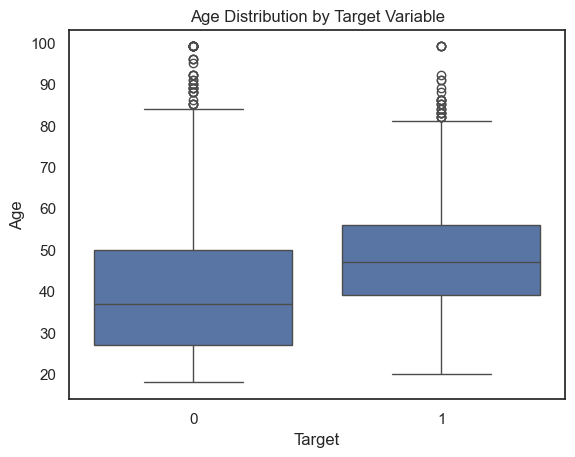

In [15]:
# As an example, could 'age' be a good explanatory variable?

sns.set(style="white")
sns.boxplot(x='target', y='age', data=df)
plt.title("Age Distribution by Target Variable")
plt.xlabel("Target")
plt.ylabel("Age")
plt.show()

# there is a slight shift in the age distribution between the groups, so this variable might be a good predictor

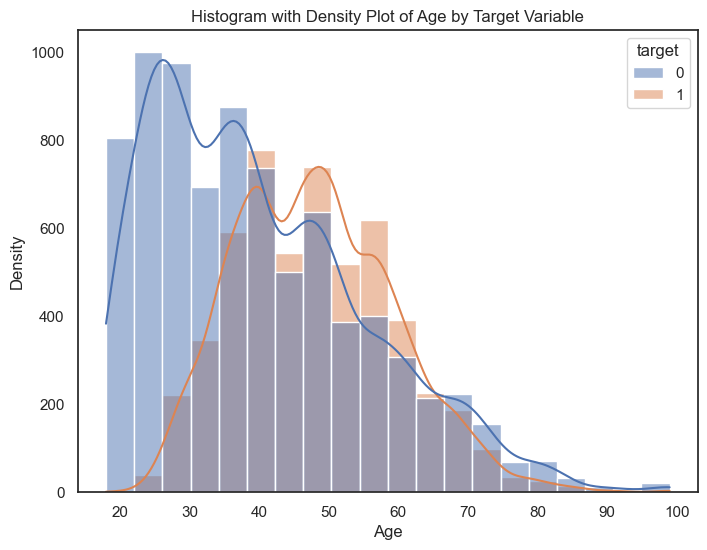

In [16]:
# Alternatively, we can visualize it using Histogram with Overlaid Density Plot

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='target', kde=True, bins=20)
plt.title("Histogram with Density Plot of Age by Target Variable")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

# we can see in more detail that there is a shift in the age distribution between the groups, meaning that this variable might be a good predictor

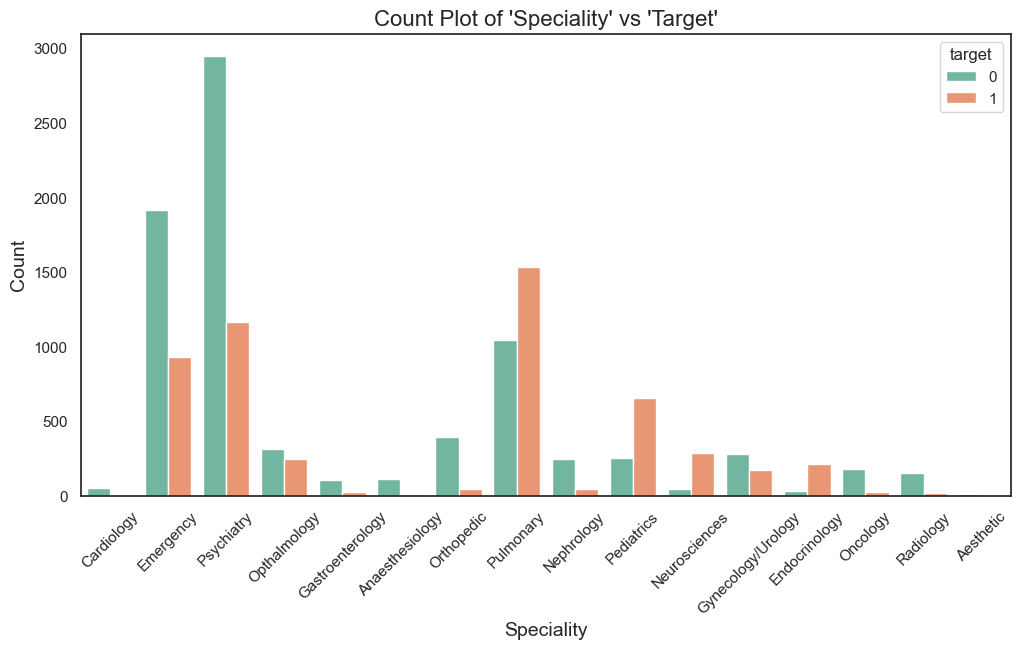

In [17]:
# How about categorical variable 'speciality'? could it be a good predictor?

plt.figure(figsize=(12, 6))
sns.countplot(x='speciality', hue='target', data=df, palette="Set2")
plt.title("Count Plot of 'Speciality' vs 'Target'", fontsize=16)
plt.xlabel("Speciality", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation = 45)
plt.show()

# These differences in distribution for each category suggest that the 'speciality' variable carries information about the target variable 
# So this variable can potentially help predictive models distinguish between different targets

### Categorical variables conversion

Pick one of the following datasets and test which one is better for model training

In [18]:
df_dummy = pd.get_dummies(df)
df_dummy = df_dummy.astype('float64')
df_dummy.shape

(13502, 99)

In [19]:
encoder = ce.BinaryEncoder()
df_binary = encoder.fit_transform(df)
df_binary = df_binary.astype('float64')
df_binary.shape

(13502, 34)

### Data Splitting

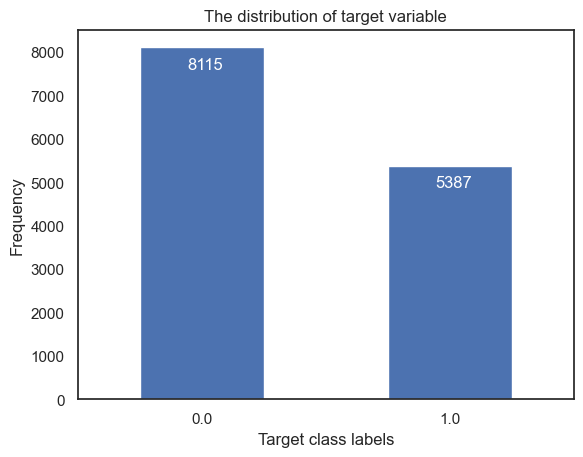

In [20]:
# Let's visualize the distribution of our target
target_distribution = df_dummy.groupby('target').size()

target_distribution.plot.bar()
plt.title('The distribution of target variable')
plt.ylabel('Frequency')
plt.xlabel("Target class labels")
plt.annotate(target_distribution[0],(0-0.06,target_distribution[0]-500),color='white')
plt.annotate(target_distribution[1],(1-0.06,target_distribution[1]-500),color='white')
plt.xticks(rotation=0)
plt.show()

# The dataset is imbalanced!



**(Here change between df_dummy and df_binary)**

In [21]:
#Separate X and y (explanatory variables and target variable)
X = df_dummy.drop(columns='target')
y = df_dummy['target']
#X = df_binary.drop(columns='target')
#y = df_binary['target']

print('X.shape:',X.shape,' & y.shape:',y.shape)


X.shape: (13502, 98)  & y.shape: (13502,)


In [22]:
# Split the data into training and testing sets
# Since the dataset is imbalanced, we will do stratified splitting to ensure that the proportion of classes in the dataset remains the same across the split datasets.
# Without stratification, there's a risk that one or more classes might be underrepresented in one of the splits, leading to biased results during model evaluation.

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.3, 
                                                    stratify=y, # we want to preserve the proportions
                                                    random_state= 123) # fix random seed for replicability

print('X_train.shape:',X_train.shape,' & y_train.shape:',y_train.shape)
print('X_test.shape:',X_test.shape,' & y_test.shape:',y_test.shape)

X_train.shape: (9451, 98)  & y_train.shape: (9451,)
X_test.shape: (4051, 98)  & y_test.shape: (4051,)


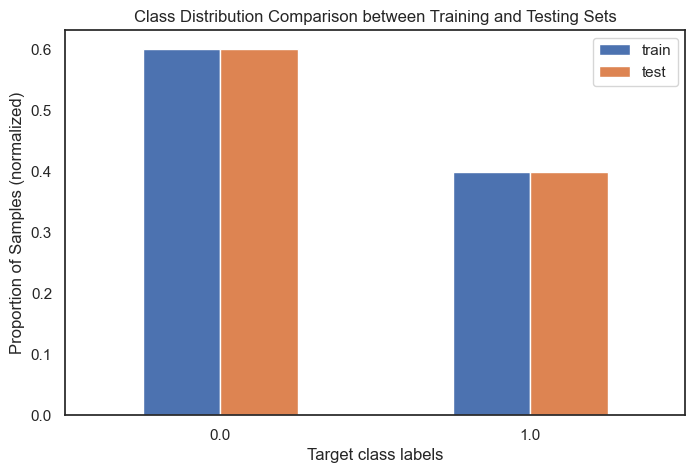

In [23]:
# This bar plot provides a comparison of class distributions, confirming that both sets preserve the original class proportions after splitting

y_train_dist=y_train.groupby(y_train).size()/y_train.size
y_test_dist=y_test.groupby(y_test).size()/y_test.size

train_test_dist = pd.DataFrame({'train': y_train_dist, 'test': y_test_dist})


train_test_dist.plot.bar(rot=0, figsize=(8, 5))
plt.title("Class Distribution Comparison between Training and Testing Sets")
plt.ylabel("Proportion of Samples (normalized)")
plt.xlabel("Target class labels")
plt.show()


### Scaling

It's generally recommended to perform scaling after splitting the data into training and testing sets. This ensures that information from the testing set does not influence the scaling process, which could lead to overly optimistic performance estimates.

**(Here change between the two scalers to see which one works best)**

In [24]:
# one of the bellow two scalers can be used
#scaler = StandardScaler()
scaler = MinMaxScaler()

scaler.fit(X_train)
# We don't want the test set to affect the scaling process

X_train_scaled = scaler.transform(X_train)
# Let's make it a data frame
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X_train.columns

X_test_scaled = scaler.transform(X_test)
# Let's make it a data frame
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = X_test.columns

### Principal Component Analysis (PCA)
When performing Principal Component Analysis (PCA), it's common practice to fit the PCA transformation only on the training data and then apply the same transformation to both the training and testing datasets. This ensures that information from the testing set does not influence the PCA transformation, preventing data leakage and providing a more accurate evaluation of the model's performance.

It's generally recommended to perform PCA on the scaled training dataset rather than the dataset that is not scaled. Scaling the data before applying PCA can lead to more meaningful and interpretable results.

C:\Users\r94ha\AppData\Local\Temp\ipykernel_735996\3277050253.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


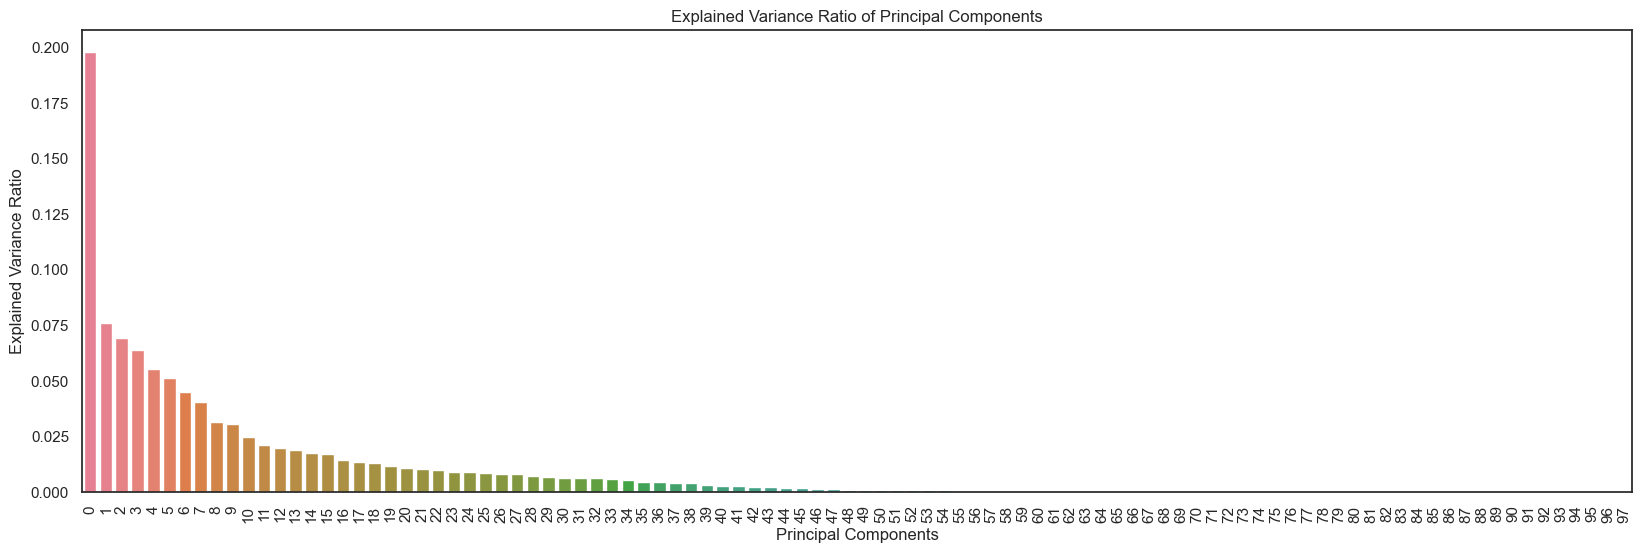

In [25]:
pca = PCA()
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
# Let's make it a data frame
X_train_pca = pd.DataFrame(X_train_pca)

X_test_pca = pca.transform(X_test_scaled)
# Let's make it a data frame
X_test_pca = pd.DataFrame(X_test_pca)

explained_variance=pd.DataFrame(pca.explained_variance_ratio_)

plt.figure(figsize=(20, 6))
ax = sns.barplot( data=explained_variance.transpose())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Explained Variance Ratio of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Components")
plt.show()

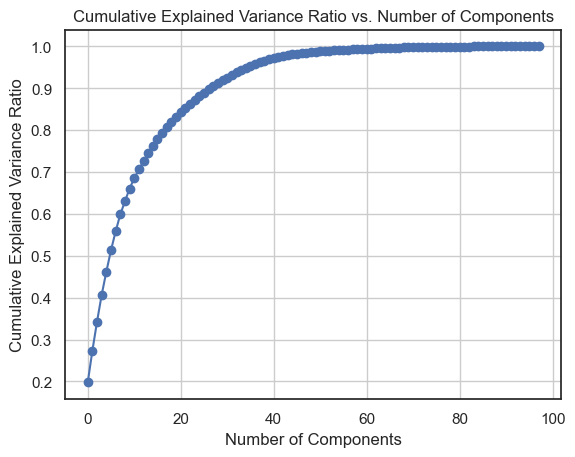

In [26]:
cumulative_variance_ratio = np.cumsum(explained_variance)

plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()


When visualizing the explained variance ratio, we don't observe a clear "elbow" or a significant drop-off in the cumulative explained variance. This suggests that the components are contributing fairly evenly to the total variance in the data. This could imply that our data may not have strong underlying structure that can be captured by a small number of principal components. So PCA might not be necessary in this case, but it could be good if you need to reduce the dimensionality.

## Model Training and Evaluation

Here we will develop some classification models

make sure to try different encodings (dummy/binary) as well as different datasets (original/scaled/pca) to see which one leads to a better model



### 1) Decision Tree


In [27]:
#Create Classifier
classifier = DecisionTreeClassifier()
# we create a dictionary to try all of these parameters
parameters = {'criterion': ['entropy','gini'], # criterion : "gini", "entropy"
              'max_depth': [5,6,7],            # The maximum depth of the tree.
              'min_samples_split': [2,3,4,5],  # The minimum number of samples required to split an internal node
              'min_samples_leaf': [1,2,3]}     # The minimum number of samples required to be at a leaf node.


# cv=cross-validation: we separate groups for training and validation
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1) # insteade of F1 we can have recal,Accuracy and etc.

In [28]:
# Train the classifier (please be patient for this one)
gs = gs.fit(X_train_scaled, y_train) # also try with X_train_scaled and X_train_pca.iloc[:,:2] (depending on the number of components you have chosen)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [29]:
# summarize the results of the GRIDSEARCH
print(f"Best score: {gs.best_score_} using {gs.best_params_}")


Best score: 0.7512440809658711 using {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [30]:
# Model performance on test set
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)
y_pred.shape

(4051,)

In [31]:
#EVALUATE YOUR PREDICTION (on the y_test)
print('***RESULTS ON TRAIN SET***')
print("f1_score:", gs.best_score_)

print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

# Store the values for a later comparison
f1_tree = metrics.f1_score(y_test, y_pred)
precision_tree = metrics.precision_score(y_test, y_pred)
recall_tree = metrics.recall_score(y_test, y_pred)
accuracy_tree = metrics.accuracy_score(y_test, y_pred)

***RESULTS ON TRAIN SET***
f1_score: 0.7512440809658711
***RESULTS ON TEST SET***
f1_score:  0.7473435655253837
precision:  0.7144469525959368
recall:  0.7834158415841584
accuracy:  0.7886941495926931


In [32]:
# Print some further metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82      2435
         1.0       0.71      0.78      0.75      1616

    accuracy                           0.79      4051
   macro avg       0.78      0.79      0.78      4051
weighted avg       0.79      0.79      0.79      4051



[[1929  506]
 [ 350 1266]]


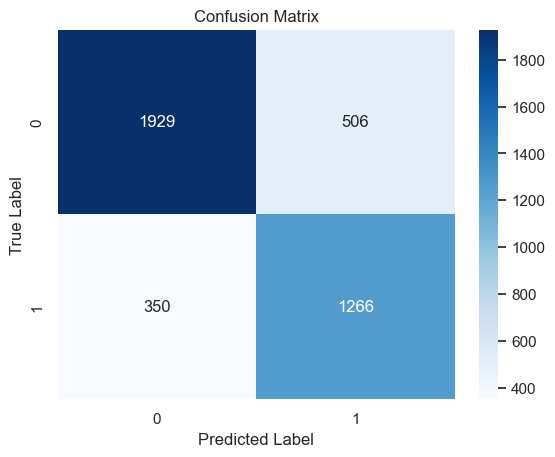

In [33]:
print(confusion_matrix(y_test, y_pred))

# Plot normalized confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

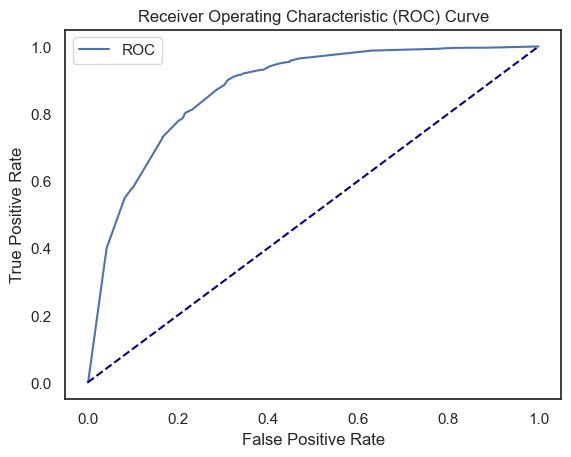

AUC: 0.87


In [34]:
y_probs = best_model.predict_proba(X_test_scaled) #try with X_test_scaled and X_test_pca.iloc[:,:2] #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

roc_auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print(f'AUC: {roc_auc:.2f}')


### 2) KNN

In [35]:
#Create KNN Classifier
classifier = KNeighborsClassifier()
# we create a dictionary to try all of these parameters
parameters = {'n_neighbors':np.arange(2,20)} #instead of just using one parameter, we use more to see which one is better

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1) # insteade of accuracy we can have recal,F1 and etc.

In [36]:
# Train the classifier (please be patient for this one)
gs = gs.fit(X_train_scaled, y_train) # also try with X_train_scaled and X_train_pca.iloc[:,:2] (depending on the number of components you have chosen)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [37]:
# summarize the results of the GRIDSEARCH
print(f"Best score: {gs.best_score_} using {gs.best_params_}")


Best score: 0.7524494801195231 using {'n_neighbors': 15}


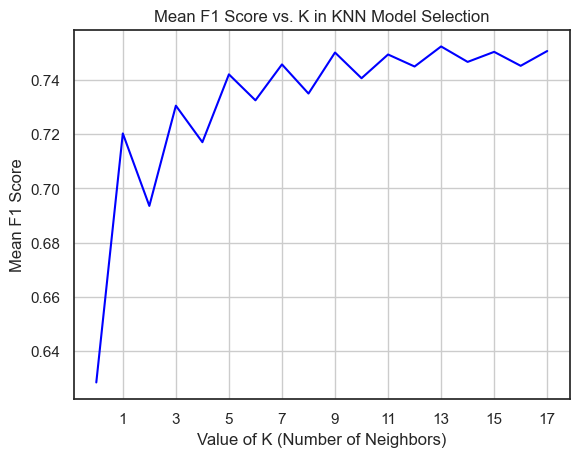

In [38]:
# Let's visualize how F1_Score changes with different values for K
# Seems like there is no point in increasing K after a certain point, that would just slow things down

means = gs.cv_results_['mean_test_score']

plt.plot (means, color='blue', alpha=1.00) #mean f1_score
plt.title("Mean F1 Score vs. K in KNN Model Selection")
plt.xlabel("Value of K (Number of Neighbors)")
plt.ylabel("Mean F1 Score")
plt.grid()
plt.xticks(range(1,18,2))
plt.show()

In [39]:
# Model performance on test set
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)
y_pred.shape


(4051,)

In [40]:
#EVALUATE YOUR PREDICTION (on the y_test)
print('***RESULTS ON TRAIN SET***')
print("f1_score:", gs.best_score_)

print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

# Store the values for a later comparison
f1_knn = metrics.f1_score(y_test, y_pred)
precision_knn = metrics.precision_score(y_test, y_pred)
recall_knn = metrics.recall_score(y_test, y_pred)
accuracy_knn = metrics.accuracy_score(y_test, y_pred)

***RESULTS ON TRAIN SET***
f1_score: 0.7524494801195231
***RESULTS ON TEST SET***
f1_score:  0.7526881720430106
precision:  0.7274826789838337
recall:  0.7797029702970297
accuracy:  0.7956060232041471


In [41]:
# Print some further metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83      2435
         1.0       0.73      0.78      0.75      1616

    accuracy                           0.80      4051
   macro avg       0.79      0.79      0.79      4051
weighted avg       0.80      0.80      0.80      4051



[[1963  472]
 [ 356 1260]]


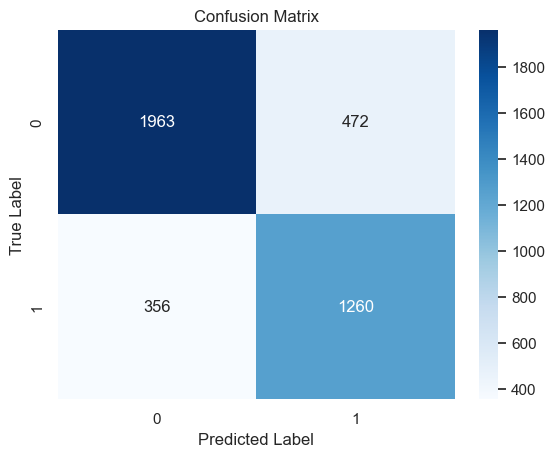

In [42]:
print(confusion_matrix(y_test, y_pred))

# Plot normalized confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

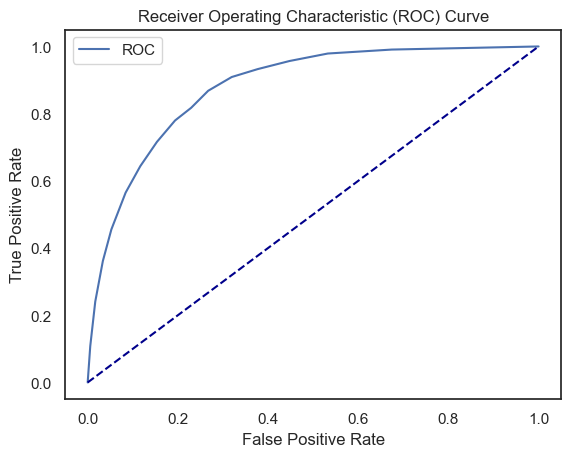

AUC: 0.88


In [43]:
y_probs = best_model.predict_proba(X_test_scaled) #try with X_test_scaled and X_test_pca.iloc[:,:2] #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

roc_auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print(f'AUC: {roc_auc:.2f}')


Seems Like the KNN model works better using the scaled data!

### 3) Logistic Regression

In [44]:
#Create LR Classifier
classifier = LogisticRegression()
# we create a dictionary to try all of these parameters
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10,100],"solver":['newton-cg','lbfgs','liblinear','sag','saga']}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1) # insteade of accuracy we can have recal,F1 and etc.

In [45]:
# Train the classifier (please be patient for this one)
gs = gs.fit(X_train_scaled, y_train) # also try with X_train_scaled and X_train_pca.iloc[:,:2] (depending on the number of components you have chosen)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


In [46]:
# summarize the results of the GRIDSEARCH
print(f"Best score: {gs.best_score_} using {gs.best_params_}")


Best score: 0.7520055168075331 using {'C': 1, 'solver': 'liblinear'}


In [47]:
# Model performance on test set
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)
y_pred.shape


(4051,)

In [48]:
#EVALUATE YOUR PREDICTION (on the y_test)
print('***RESULTS ON TRAIN SET***')
print("f1_score:", gs.best_score_)

print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

# Store the values for a later comparison
f1_lr = metrics.f1_score(y_test, y_pred)
precision_lr = metrics.precision_score(y_test, y_pred)
recall_lr = metrics.recall_score(y_test, y_pred)
accuracy_lr = metrics.accuracy_score(y_test, y_pred)

***RESULTS ON TRAIN SET***
f1_score: 0.7520055168075331
***RESULTS ON TEST SET***
f1_score:  0.7535341118623233
precision:  0.7484737484737485
recall:  0.7586633663366337
accuracy:  0.80202419155764


In [49]:
# Print some further metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83      2435
         1.0       0.75      0.76      0.75      1616

    accuracy                           0.80      4051
   macro avg       0.79      0.79      0.79      4051
weighted avg       0.80      0.80      0.80      4051



[[2023  412]
 [ 390 1226]]


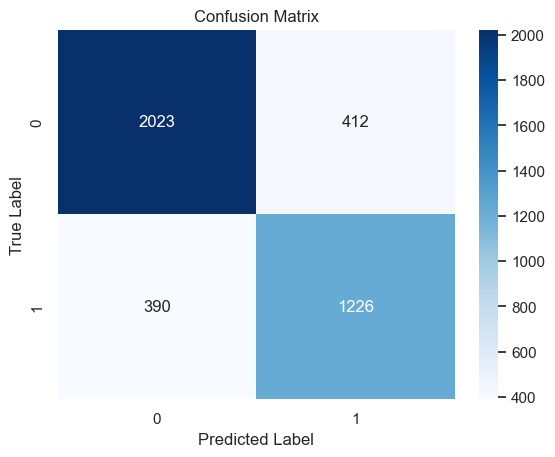

In [50]:
print(confusion_matrix(y_test, y_pred))

# Plot normalized confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

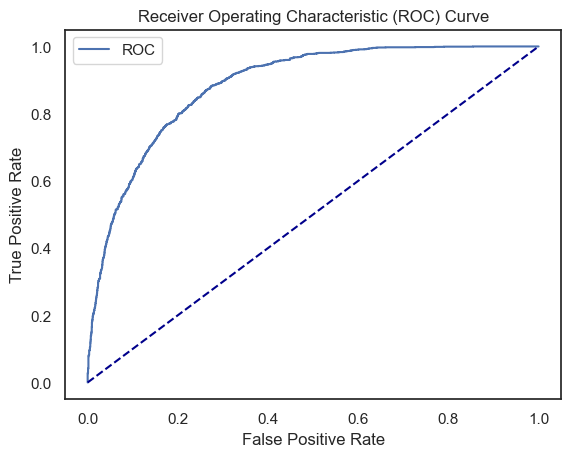

AUC: 0.88


In [51]:
y_probs = best_model.predict_proba(X_test_scaled) #try with X_test_scaled and X_test_pca.iloc[:,:2] #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

roc_auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print(f'AUC: {roc_auc:.2f}')


### 4) MLPerceptron

In [52]:
#Create MLP Classifier
classifier = MLPClassifier()
# we create a dictionary to try all of these parameters
parameters = {"hidden_layer_sizes":[(5, 2),(10,8,5),(100,20)],  "max_iter": [100,200], "alpha": [0.00001,0.001,0.1]}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1) # insteade of accuracy we can have recal,F1 and etc.

In [53]:
# Train the classifier (please be patient for this one)
gs = gs.fit(X_train_scaled, y_train) # also try with X_train_scaled and X_train_pca.iloc[:,:2] (depending on the number of components you have chosen)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


c:\DataScience\Anaconda3\envs\Casual\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
# summarize the results of the GRIDSEARCH
print(f"Best score: {gs.best_score_} using {gs.best_params_}")


Best score: 0.7601426656642499 using {'alpha': 0.1, 'hidden_layer_sizes': (5, 2), 'max_iter': 100}


In [55]:
# Model performance on test set
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)
y_pred.shape


(4051,)

In [56]:
#EVALUATE YOUR PREDICTION (on the y_test)
print('***RESULTS ON TRAIN SET***')
print("f1_score:", gs.best_score_)

print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

# Store the values for a later comparison
f1_mlp = metrics.f1_score(y_test, y_pred)
precision_mlp = metrics.precision_score(y_test, y_pred)
recall_mlp = metrics.recall_score(y_test, y_pred)
accuracy_mlp = metrics.accuracy_score(y_test, y_pred)

***RESULTS ON TRAIN SET***
f1_score: 0.7601426656642499
***RESULTS ON TEST SET***
f1_score:  0.7532387415175819
precision:  0.7509225092250923
recall:  0.755569306930693
accuracy:  0.802517896815601


In [57]:
# Print some further metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84      2435
         1.0       0.75      0.76      0.75      1616

    accuracy                           0.80      4051
   macro avg       0.79      0.79      0.79      4051
weighted avg       0.80      0.80      0.80      4051



[[2030  405]
 [ 395 1221]]


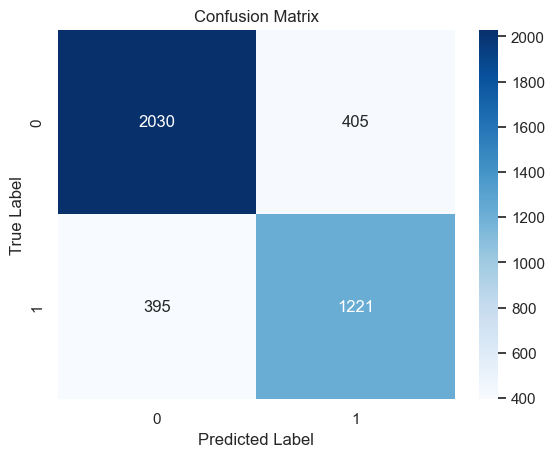

In [58]:
print(confusion_matrix(y_test, y_pred))

# Plot normalized confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

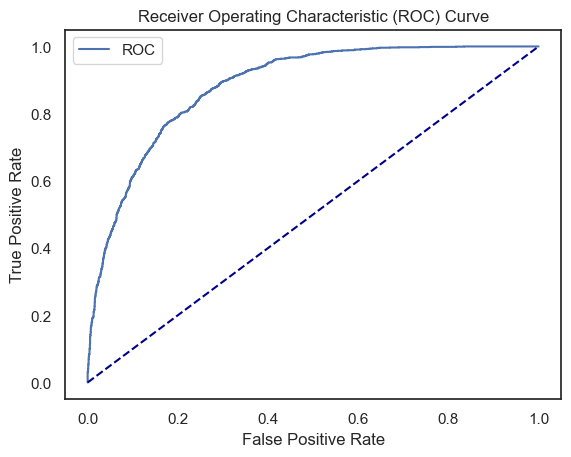

AUC: 0.88


In [59]:
y_probs = best_model.predict_proba(X_test_scaled) #try with X_test_scaled and X_test_pca.iloc[:,:2] #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

roc_auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print(f'AUC: {roc_auc:.2f}')


### 5) Naive Bayes

In [60]:
'''
NAIVE BAYES classifier:

(1) Training is fast because only the probability of each class and the probability of each class given different input values need to be calculated. 
(2) No coefficients need to be fitted by optimization procedures!

Bernoulli Naive Bayes: it assumes that all our features are binary.
Multinomial Naive Bayes: it is used when we discrete data
Gaussian Naive Bayes: Naive Bayes can be extended to real-valued attributes, 
    most commonly by assuming a Gaussian distribution.
'''

# Create the model
model = GaussianNB() #no parameters to tune
# Train the classifier
model.fit(X_train_scaled, y_train) # also try with X_train_scaled and X_train_pca.iloc[:,:2] (depending on the number of components you have chosen)
y_pred=model.predict(X_test_scaled) # also try with X_test_scaled and X_test_pca.iloc[:,:2]  (depending on the number of components you have chosen)
y_pred.shape

(4051,)

In [61]:
#EVALUATE YOUR PREDICTION (on the y_test)

print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

# Store the values for a later comparison
f1_nb = metrics.f1_score(y_test, y_pred)
precision_nb = metrics.precision_score(y_test, y_pred)
recall_nb = metrics.recall_score(y_test, y_pred)
accuracy_nb = metrics.accuracy_score(y_test, y_pred)

***RESULTS ON TEST SET***
f1_score:  0.6519898391193903
precision:  0.4954954954954955
recall:  0.9529702970297029
accuracy:  0.5941742779560603


In [62]:
# Print some further metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.36      0.51      2435
         1.0       0.50      0.95      0.65      1616

    accuracy                           0.59      4051
   macro avg       0.71      0.65      0.58      4051
weighted avg       0.75      0.59      0.57      4051



[[ 867 1568]
 [  76 1540]]


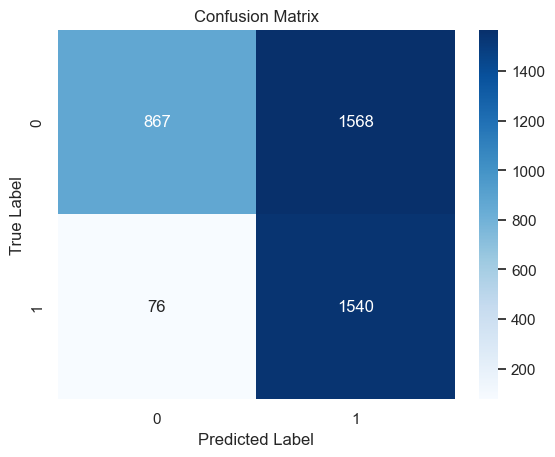

In [63]:
print(confusion_matrix(y_test, y_pred))

# Plot normalized confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

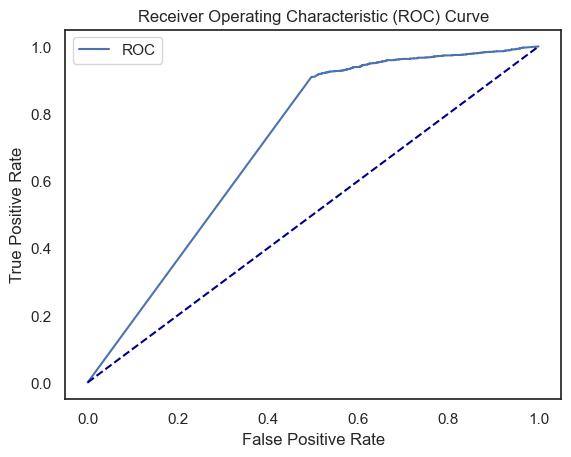

AUC: 0.71


In [64]:
y_probs = model.predict_proba(X_test_scaled) #try with X_test_scaled and X_test_pca.iloc[:,:2] #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

roc_auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print(f'AUC: {roc_auc:.2f}')


The Naive Bayes shows better results when using unscaled data. However, the results are still not as good as the other models!

Note: The results get a little better using pca! 

### 6) SVM

In [65]:
#Create the Classifier
classifier = SVC(probability=True)
# we create a dictionary to try all of these parameters
parameters = {"kernel":['linear'], "C":[0.1,100],"gamma":[1e-4,0.01]}

# C : Penalty parameter C of the error term.
# kernel : kernel type. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable.
# degree : Degree of the polynomial kernel function (‘poly’)
# gamma : Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
# coef0 : Independent term in kernel function.
# tol : Tolerance for stopping criterion.
# class_weight : Set the parameter C of class i to class_weight[i]*C for SVC.

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1) # insteade of accuracy we can have recal,F1 and etc.

In [66]:
# Train the classifier (please be 'very' patient for this one)
gs = gs.fit(X_train_scaled, y_train) # also try with X_train_scaled and X_train_pca.iloc[:,:2] (depending on the number of components you have chosen)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [67]:
# summarize the results of the GRIDSEARCH
print(f"Best score: {gs.best_score_} using {gs.best_params_}")


Best score: 0.7482339404891941 using {'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}


In [68]:
# Model performance on test set
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)
y_pred.shape


(4051,)

In [69]:
#EVALUATE YOUR PREDICTION (on the y_test)
print('***RESULTS ON TRAIN SET***')
print("f1_score:", gs.best_score_)

print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

# Store the values for a later comparison
f1_svm = metrics.f1_score(y_test, y_pred)
precision_svm = metrics.precision_score(y_test, y_pred)
recall_svm = metrics.recall_score(y_test, y_pred)
accuracy_svm = metrics.accuracy_score(y_test, y_pred)

***RESULTS ON TRAIN SET***
f1_score: 0.7482339404891941
***RESULTS ON TEST SET***
f1_score:  0.7377245508982035
precision:  0.7146171693735499
recall:  0.7623762376237624
accuracy:  0.7837570970130832


In [70]:
# Print some further metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.82      2435
         1.0       0.71      0.76      0.74      1616

    accuracy                           0.78      4051
   macro avg       0.77      0.78      0.78      4051
weighted avg       0.79      0.78      0.78      4051



[[1943  492]
 [ 384 1232]]


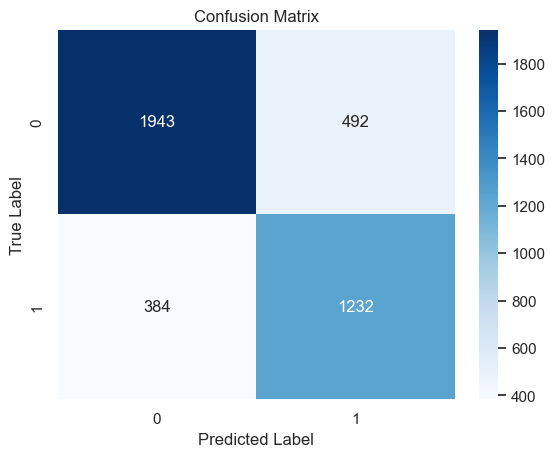

In [71]:
print(confusion_matrix(y_test, y_pred))

# Plot normalized confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

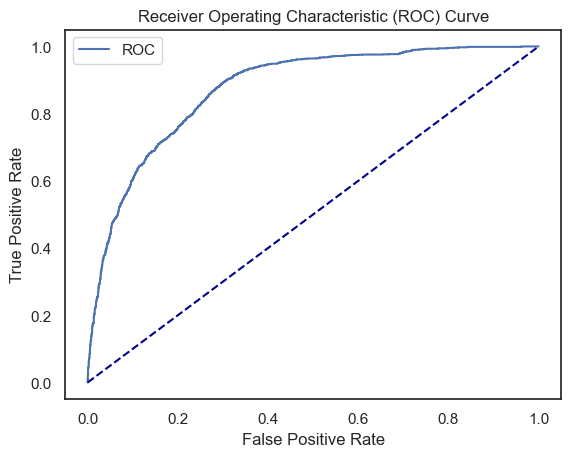

AUC: 0.87


In [72]:
y_probs = best_model.predict_proba(X_test_scaled) #try with X_test_scaled and X_test_pca.iloc[:,:2] #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

roc_auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print(f'AUC: {roc_auc:.2f}')


## Conclusion

In [73]:
# Let's compare the different models
classification_scores = {'Model':['Decision Tree','KNN','Logistic Regression','ML Perceptron','Naive Bayes','SVM'],
                         'Precision':[precision_tree,precision_knn,precision_lr,precision_mlp,precision_nb,precision_svm],
                         'Recall':[recall_tree,recall_knn,recall_lr,recall_mlp,recall_nb,recall_svm],
                         'F1 Score':[f1_tree,f1_knn,f1_lr,f1_mlp,f1_nb,f1_svm],
                         'Accuracy':[accuracy_tree,accuracy_knn,accuracy_lr,accuracy_mlp,accuracy_nb,accuracy_svm]
                         }

scores_df = pd.DataFrame(classification_scores)
scores_df.set_index('Model', inplace=True)
scores_df.index.name = None
scores_df

,Precision,Recall,F1 Score,Accuracy
Decision Tree,0.714447,0.783416,0.747344,0.788694
KNN,0.727483,0.779703,0.752688,0.795606
Logistic Regression,0.748474,0.758663,0.753534,0.802024
ML Perceptron,0.750923,0.755569,0.753239,0.802518
Naive Bayes,0.495495,0.952970,0.651990,0.594174
SVM,0.714617,0.762376,0.737725,0.783757


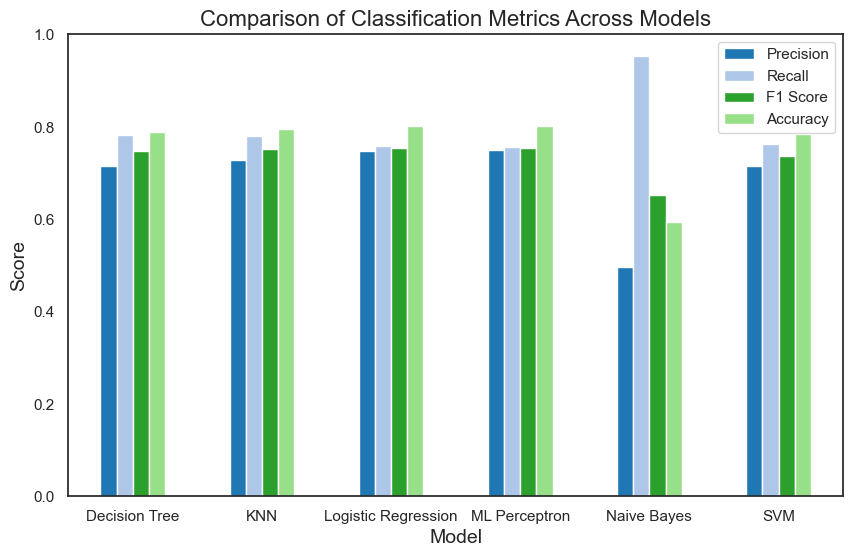

In [74]:
# Let's visualize this comparison
scores_df.plot.bar(rot=0, figsize=(10, 6),color=['#1f77b4', '#aec7e8', '#2ca02c', '#98df8a'])
plt.title('Comparison of Classification Metrics Across Models', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.show()

Looks like the models have similar performance!